In [9]:
pip install wbgapi

Note: you may need to restart the kernel to use updated packages.


In [10]:
import wbgapi as wb   # I use wb as a namespace in all my work
import pandas as pd   # optional but highly recommended for wbgapi
import numpy as np    #import NumPy for numerical computing
import seaborn as sns #import the Seaborn library for visualization
import matplotlib.pyplot as plt #import Matplotlib for creating static, animated, and interactive visualizations

%matplotlib inline

In [11]:
data = wb.series.info()
print(data)

id                         value
-------------------------  --------------------------------------------------------------------------------------------------------------------------------------------
AG.AGR.TRAC.NO             Agricultural machinery, tractors
AG.CON.FERT.PT.ZS          Fertilizer consumption (% of fertilizer production)
AG.CON.FERT.ZS             Fertilizer consumption (kilograms per hectare of arable land)
AG.LND.AGRI.K2             Agricultural land (sq. km)
AG.LND.AGRI.ZS             Agricultural land (% of land area)
AG.LND.ARBL.HA             Arable land (hectares)
AG.LND.ARBL.HA.PC          Arable land (hectares per person)
AG.LND.ARBL.ZS             Arable land (% of land area)
AG.LND.CREL.HA             Land under cereal production (hectares)
AG.LND.CROP.ZS             Permanent cropland (% of land area)
AG.LND.EL5M.RU.K2          Rural land area where elevation is below 5 meters (sq. km)
AG.LND.EL5M.RU.ZS          Rural land area where elevation is below 5 me

In [16]:
data = wb.data.DataFrame('SP.POP.TOTL',('VNM','SGP'), time=range(2000, 2020), labels=True)
print(data)

           Country      YR2000      YR2001      YR2002      YR2003  \
economy                                                              
SGP      Singapore   4027887.0   4138012.0   4175950.0   4114826.0   
VNM        Vietnam  79001142.0  79817777.0  80642308.0  81475825.0   

             YR2004      YR2005      YR2006      YR2007      YR2008  ...  \
economy                                                              ...   
SGP       4166664.0   4265762.0   4401365.0   4588599.0   4839396.0  ...   
VNM      82311227.0  83142095.0  83951800.0  84762269.0  85597241.0  ...   

             YR2010      YR2011      YR2012      YR2013      YR2014  \
economy                                                               
SGP       5076732.0   5183688.0   5312437.0   5399162.0   5469724.0   
VNM      87411012.0  88349117.0  89301326.0  90267739.0  91235504.0   

             YR2015      YR2016      YR2017      YR2018      YR2019  
economy                                                    

In [17]:
print(data.isnull().any())

Country    False
YR2000     False
YR2001     False
YR2002     False
YR2003     False
YR2004     False
YR2005     False
YR2006     False
YR2007     False
YR2008     False
YR2009     False
YR2010     False
YR2011     False
YR2012     False
YR2013     False
YR2014     False
YR2015     False
YR2016     False
YR2017     False
YR2018     False
YR2019     False
dtype: bool


In [18]:
# Identify and treat outliers for numeric columns only
numeric_columns = data.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    data[column] = data[column].fillna(data[column].mean())  # Handle missing values
    z_scores = np.abs((data[column] - data[column].mean()) / data[column].std())
    outliers = z_scores > 3  # Adjust the threshold as needed
    data.loc[outliers, column] = data[column].mean()  # Replace outliers with the mean

In [19]:
# Print the first few rows of the DataFrame to inspect the data with missing values filled and outliers treated
print(data.head())

           Country      YR2000      YR2001      YR2002      YR2003  \
economy                                                              
SGP      Singapore   4027887.0   4138012.0   4175950.0   4114826.0   
VNM        Vietnam  79001142.0  79817777.0  80642308.0  81475825.0   

             YR2004      YR2005      YR2006      YR2007      YR2008  ...  \
economy                                                              ...   
SGP       4166664.0   4265762.0   4401365.0   4588599.0   4839396.0  ...   
VNM      82311227.0  83142095.0  83951800.0  84762269.0  85597241.0  ...   

             YR2010      YR2011      YR2012      YR2013      YR2014  \
economy                                                               
SGP       5076732.0   5183688.0   5312437.0   5399162.0   5469724.0   
VNM      87411012.0  88349117.0  89301326.0  90267739.0  91235504.0   

             YR2015      YR2016      YR2017      YR2018      YR2019  
economy                                                    

In [20]:
# Print the entire DataFrame to inspect the data with missing values filled and outliers treated
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
print(data)

           Country      YR2000      YR2001      YR2002      YR2003  \
economy                                                              
SGP      Singapore   4027887.0   4138012.0   4175950.0   4114826.0   
VNM        Vietnam  79001142.0  79817777.0  80642308.0  81475825.0   

             YR2004      YR2005      YR2006      YR2007      YR2008  ...  \
economy                                                              ...   
SGP       4166664.0   4265762.0   4401365.0   4588599.0   4839396.0  ...   
VNM      82311227.0  83142095.0  83951800.0  84762269.0  85597241.0  ...   

             YR2010      YR2011      YR2012      YR2013      YR2014  \
economy                                                               
SGP       5076732.0   5183688.0   5312437.0   5399162.0   5469724.0   
VNM      87411012.0  88349117.0  89301326.0  90267739.0  91235504.0   

             YR2015      YR2016      YR2017      YR2018      YR2019  
economy                                                    

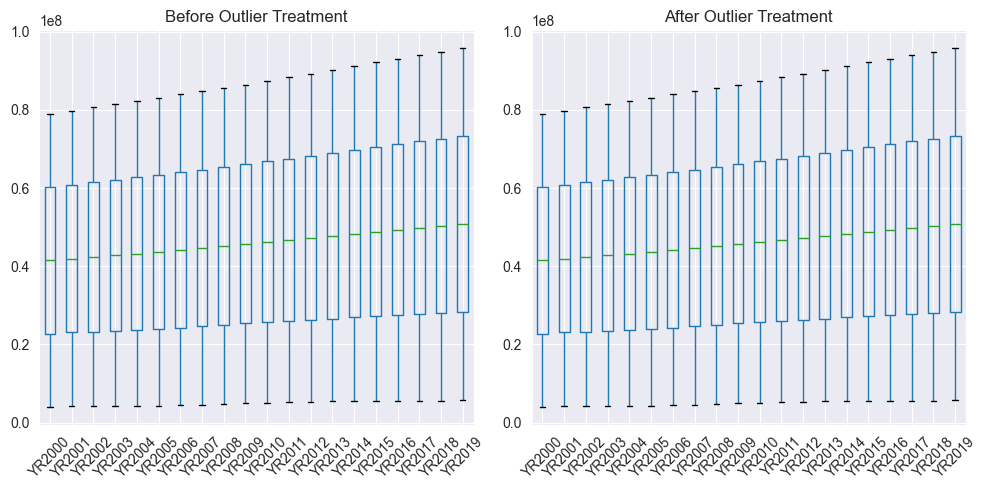

In [22]:
# Visualize the data distribution before and after outlier treatment
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('Before Outlier Treatment')
data[numeric_columns].boxplot()
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.title('After Outlier Treatment')
data[numeric_columns].boxplot()
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()